In this project, we will treat a dataset to be used in a ML model. Here, we gonna analyze the churn rate in a telecomunication enterprise.

# Importing database

In [135]:
import pandas as pd

In [136]:
url = 'dataset-telecon.json'

In [137]:
data = pd.read_json(url)
data

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
...,...,...,...,...,...,...
7339,5172-RKOCB,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'dois anos', 'faturamente_eletron..."
7340,1934-MKPXS,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'nao', 'seguranca_online'...","{'contrato': 'um ano', 'faturamente_eletronico..."
7341,5959-BELXA,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
7342,3601-UTZXO,,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'nao', 'seguranca_online'...","{'contrato': 'um ano', 'faturamente_eletronico..."


In [138]:
import json

with open(url, 'r') as file:
    json_bruto = json.load(file)


data = pd.json_normalize(json_bruto)

# Data exploration and transformation

In [139]:
data.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [141]:
columns = list(data.columns)

for column in columns:
    print('--' *20)
    print(f'Column -> {column}')
    print(f'{data[column].unique()}')

----------------------------------------
Column -> id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------
Column -> Churn
['nao' 'sim' '']
----------------------------------------
Column -> cliente.genero
['feminino' 'masculino']
----------------------------------------
Column -> cliente.idoso
[0 1]
----------------------------------------
Column -> cliente.parceiro
['sim' 'nao']
----------------------------------------
Column -> cliente.dependentes
['sim' 'nao']
----------------------------------------
Column -> cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.

## Churn column

In [142]:
data2 = data.query('Churn != ""').reset_index(drop=True).copy()

In [143]:
data2.Churn.unique()

array(['nao', 'sim'], dtype=object)

## conta.cobranca.Total

In [144]:
data2.isnull().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   32
conta.faturamente_eletronico     18
conta.metodo_pagamento           27
conta.cobranca.mensal            18
conta.cobranca.Total             16
dtype: int64

In [145]:
null_columns = list(data2.loc[:, data2.isnull().any()].columns)
null_columns

['cliente.tempo_servico',
 'conta.contrato',
 'conta.faturamente_eletronico',
 'conta.metodo_pagamento',
 'conta.cobranca.mensal',
 'conta.cobranca.Total']

In [146]:
data2[data2['conta.cobranca.Total'] == ' '][null_columns]

,cliente.tempo_servico,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
945,0.0,dois anos,nao,cartao de credito (automatico),56.05,
1731,0.0,dois anos,nao,cheque pelo correio,20.00,
1906,0.0,dois anos,sim,transferencia bancaria (automatica),61.90,
2025,0.0,um ano,sim,cheque pelo correio,19.70,
2176,0.0,dois anos,nao,cheque pelo correio,20.25,
2250,0.0,dois anos,nao,cheque pelo correio,25.35,
2855,0.0,dois anos,nao,cheque pelo correio,73.35,
3052,0.0,dois anos,nao,cheque pelo correio,25.75,
3118,0.0,dois anos,sim,transferencia bancaria (automatica),52.55,
4054,0.0,dois anos,nao,cheque pelo correio,80.85,


In [147]:
data2.iloc[2025, -1] = data2.iloc[2025, -2] * 12

In [148]:
idx_null = data2[data2['conta.cobranca.Total'] == ' '][null_columns].index

In [149]:
data2.loc[idx_null, 'conta.cobranca.Total'] = data2.loc[idx_null, 'conta.cobranca.mensal'] * 24

# Dealing with null values

In [150]:
data2.isnull().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   32
conta.faturamente_eletronico     18
conta.metodo_pagamento           27
conta.cobranca.mensal            18
conta.cobranca.Total             16
dtype: int64

### Transforming type

In [151]:
data2['conta.cobranca.Total'] = data2['conta.cobranca.Total'].astype('float64')

### cliente.tempo_servico

In [152]:
filter = data2['cliente.tempo_servico'].isnull()

In [153]:
data2[filter][null_columns]

,cliente.tempo_servico,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,dois anos,sim,cheque pelo correio,90.45,5957.90
176,NaN,mes a mes,sim,cheque pelo correio,29.30,355.90
181,NaN,mes a mes,sim,cartao de credito (automatico),63.95,318.10
751,NaN,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
3523,NaN,dois anos,nao,transferencia bancaria (automatica),76.10,1054.80
5273,NaN,um ano,nao,cheque pelo correio,20.60,116.60
5276,NaN,um ano,sim,transferencia bancaria (automatica),73.85,3581.40
6134,NaN,um ano,nao,transferencia bancaria (automatica),69.05,1958.45


In [154]:
data2.isnull().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   32
conta.faturamente_eletronico     18
conta.metodo_pagamento           27
conta.cobranca.mensal            18
conta.cobranca.Total             16
dtype: int64

In [155]:
data2[data2.isnull().any(axis = 1)][null_columns]

,cliente.tempo_servico,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,9.0,None,None,None,NaN,NaN
9,NaN,dois anos,sim,cheque pelo correio,90.45,5957.90
176,NaN,mes a mes,sim,cheque pelo correio,29.30,355.90
181,NaN,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,67.0,None,None,cartao de credito (automatico),NaN,6886.25
751,NaN,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
963,21.0,None,sim,None,NaN,1565.70
1604,18.0,None,nao,None,20.05,NaN
1605,23.0,None,nao,None,NaN,NaN
1606,55.0,None,sim,cartao de credito (automatico),NaN,NaN


In [156]:
import numpy as np

data2['cliente.tempo_servico'].fillna(
    np.ceil(data2['conta.cobranca.Total'] / data2['conta.cobranca.mensal']), inplace = True
)

### Dealing with other columns

In [157]:
data2.isnull().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             0
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   32
conta.faturamente_eletronico     18
conta.metodo_pagamento           27
conta.cobranca.mensal            18
conta.cobranca.Total             16
dtype: int64

In [158]:
drop_columns = ['conta.contrato', 'conta.faturamente_eletronico', 'conta.metodo_pagamento']

In [159]:
data2.dropna(subset= drop_columns, inplace=True)

In [160]:
data2.reset_index(drop = True, inplace=True)

# Duplicate values

In [161]:
data2.duplicated().sum()


74

In [162]:
data2[data2.duplicated()]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7006,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7007,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7008,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7009,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7010,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7076,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7077,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7078,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [163]:
data_final = data2.drop_duplicates()

In [164]:
data_final.reset_index(drop = True, inplace = True)

# Outliers

In [165]:
def find_outliers(data, column):
    import seaborn as sns

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior= Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5*IQR
    
    filtro_outliers = (data[column] < limite_inferior) | (data[column] > limite_superior)

    return filtro_outliers

In [166]:
import seaborn as sns

<Axes: >

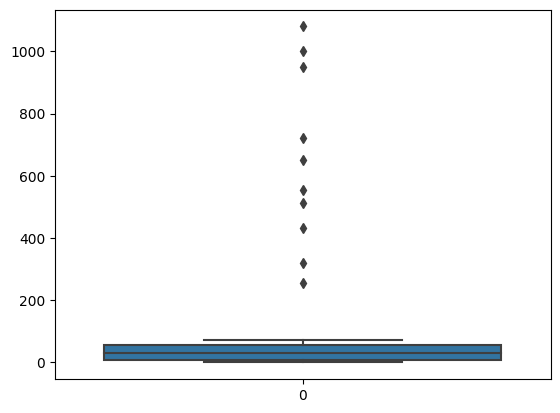

In [167]:
sns.boxplot(data_final['cliente.tempo_servico'])

In [168]:
outliers = find_outliers(data_final,'cliente.tempo_servico' )

In [169]:
data_final[outliers].index

Int64Index([1945, 1946, 1952, 1956, 1958, 1963, 1966, 1970, 1973, 1974], dtype='int64')

In [170]:
data_final = data_final.drop(data_final[outliers].index).copy()

In [171]:
data_final.reset_index(drop = True, inplace = True)

# Mapping text values in int

In [172]:
data_final.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [173]:
mapping = {'sim': 1, 'nao': 0, 'masculino': 1, 'feminino': 0}
binary_columns = ['telefone.servico_telefone', 'Churn', 'cliente.parceiro', 'cliente.dependentes', 'conta.faturamente_eletronico', 'cliente.genero']

data_final[binary_columns] = data_final[binary_columns].replace(mapping)

In [174]:
data_final

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,0,1,0,0,0,9.0,1,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,1,1,0,0,0,4.0,1,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85
2,0011-IGKFF,1,1,1,1,0,13.0,1,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,1,0,1,1,0,3.0,1,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40
4,0013-MHZWF,0,0,0,0,1,9.0,1,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,9987-LUTYD,0,0,0,0,0,13.0,1,nao,DSL,...,nao,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90
6992,9992-RRAMN,1,1,0,1,0,22.0,1,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70
6993,9992-UJOEL,0,1,0,0,0,2.0,1,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75
6994,9993-LHIEB,0,1,0,1,1,67.0,1,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65


# Dummies

In [175]:
data_final.drop('id_cliente', axis = 1, inplace = True)

In [176]:
data_final = pd.get_dummies(data_final, dtype = int)

In [177]:
data_final.head(5)

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,...,internet.filmes_streaming_nao,internet.filmes_streaming_sem servico de internet,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,0,1,0,0,0,9.0,1,0,59.9,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,1,0,0,0,4.0,1,1,73.9,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,1,1,1,0,13.0,1,1,98.0,1237.85,...,0,0,1,0,1,0,0,1,0,0
3,1,0,1,1,0,3.0,1,1,83.9,267.40,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,9.0,1,1,69.4,571.45,...,0,0,1,0,1,0,1,0,0,0


In [178]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Churn                                                       6996 non-null   int64  
 1   cliente.genero                                              6996 non-null   int64  
 2   cliente.idoso                                               6996 non-null   int64  
 3   cliente.parceiro                                            6996 non-null   int64  
 4   cliente.dependentes                                         6996 non-null   int64  
 5   cliente.tempo_servico                                       6996 non-null   float64
 6   telefone.servico_telefone                                   6996 non-null   int64  
 7   conta.faturamente_eletronico                                6996 non-null   int64  
 8 

# Building a ML model

In [179]:
data_final.head(3)

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,...,internet.filmes_streaming_nao,internet.filmes_streaming_sem servico de internet,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,0,1,0,0,0,9.0,1,0,59.9,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,1,0,0,0,4.0,1,1,73.9,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,1,1,1,0,13.0,1,1,98.0,1237.85,...,0,0,1,0,1,0,0,1,0,0


In [180]:
x = data_final.drop('Churn', axis = 1)
y = data_final['Churn']

## Verifying if churn is disbalanced


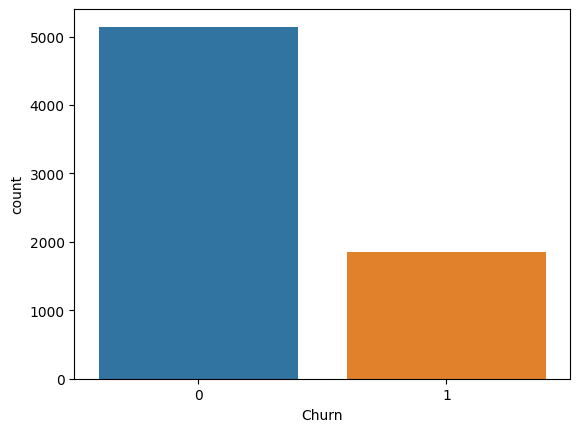

In [181]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=data_final)

In [182]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
x, y = smt.fit_resample(x, y)  # Realiza a reamostragem do conjunto de dados

In [183]:
data_final_2 = pd.concat([x, y], axis=1)  # Concatena a variável target (y) com as features (X)


In [184]:
data_final_2

,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,telefone.varias_linhas_nao,...,internet.filmes_streaming_sem servico de internet,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica),Churn
0,1,0,0,0,9.000000,1,0,59.900000,542.400000,0,...,0,1,0,1,0,0,0,1,0,0
1,1,0,0,0,4.000000,1,1,73.900000,280.850000,1,...,0,0,0,1,0,0,1,0,0,1
2,1,1,1,0,13.000000,1,1,98.000000,1237.850000,1,...,0,1,0,1,0,0,1,0,0,1
3,0,1,1,0,3.000000,1,1,83.900000,267.400000,1,...,0,0,0,1,0,0,0,1,0,1
4,0,0,0,1,9.000000,1,1,69.400000,571.450000,1,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,1,0,1,0,5.000000,1,1,79.830085,413.878963,0,...,0,0,0,1,0,0,1,0,0,1
10286,0,0,0,0,6.000000,1,0,78.130729,434.420923,0,...,0,0,0,1,0,0,1,0,0,1
10287,0,0,0,0,33.886803,1,0,74.272611,2524.618380,1,...,0,0,0,0,0,0,0,0,0,1
10288,0,0,0,0,12.001144,1,1,100.145997,1164.298342,0,...,0,1,0,1,0,0,0,0,0,1


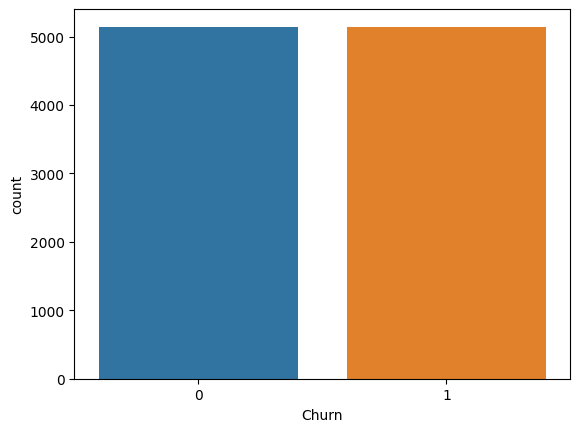

In [185]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=data_final_2)

In [186]:
# Split inputs and outputs 
x = data_final_2.drop('Churn', axis = 1)
y = data_final_2['Churn']

In [187]:
y

0        0
1        1
2        1
3        1
4        0
        ..
10285    1
10286    1
10287    1
10288    1
10289    1
Name: Churn, Length: 10290, dtype: int64

## KNN Model

In [188]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("We will train with %d elements and test with %d elements" % (len(raw_x_train), len(raw_x_test)))

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)

print(f'KNN model has {accuracy_score(y_test, knn_predict)*100:.2f}%')


We will train with 7717 elements and test with 2573 elements
KNN model has 82.74%


## Dummy mostfrequent

In [189]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy = 'most_frequent')
dummy_mostfrequent.fit(x_train, y_train)
accuracy = dummy_mostfrequent.score(x_test, y_test)*100

# accuracy = accuracy_score(y_test, predictions) * 100
print(f'The Dummy mostfrequent accuracy was {accuracy:.2f}%')

The Dummy mostfrequent accuracy was 49.98%


## SVC

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 42
np.random.seed(SEED)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("We will train with %d elements and test with %d elements" % (len(raw_x_train), len(raw_x_test)))

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)


model = SVC(gamma='auto')
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions) * 100
print(f'The accuracy was {accuracy:.2f}%')

We will train with 7717 elements and test with 2573 elements


The accuracy was 85.15%


## Decision TreeClassifier

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, stratify= y)
print("We will train with %d elements and test with %d elements" % (len(x_train), len(x_test)))

tree = DecisionTreeClassifier(criterion= 'entropy')
tree.fit(x_train, y_train)
tree_predict = tree.predict(x_test)

tree_accuracy = accuracy_score(y_test, tree_predict)

print(f'The accuracy was {tree_accuracy*100:.2f}%')

We will train with 7717 elements and test with 2573 elements
The accuracy was 80.72%


## Naive Bayes

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_normalized = scaler.transform(x)

In [193]:
np.median(x_normalized)


-0.4395245364957663

In [194]:

# importing the library
from sklearn.naive_bayes import BernoulliNB

SEED = 42
np.random.seed(SEED)
bnb = BernoulliNB(binarize = 0.4395)

bnb.fit(x_train, y_train)
predict_bnb = bnb.predict(x_test)
accuracy_bnb = bnb.score(x_test, y_test)

print(f'The Naive Bayes accuracy was {accuracy_bnb*100:.2f}%')

The Naive Bayes accuracy was 77.73%


# Random Forest Classifier


In [195]:
def rfc_classificator(x, y):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    import numpy as np

    SEED = 42
    np.random.seed(SEED)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25)
    print("We will train with %d elements and test with %d elements" % (len(x_train), len(x_test)))

    rfc = RandomForestClassifier(n_estimators= 100)
    rfc.fit(x_train, y_train)
    rfc.predict(x_test)

    print(f'RFC result: {rfc.score(x_test, y_test)*100:.2f}%')

rfc_classificator(x, y)

We will train with 7717 elements and test with 2573 elements
RFC result: 85.35%


# Correlation matrix

In [196]:
x.head()

,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,telefone.varias_linhas_nao,...,internet.filmes_streaming_nao,internet.filmes_streaming_sem servico de internet,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,1,0,0,0,9.0,1,0,59.9,542.40,0,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,4.0,1,1,73.9,280.85,1,...,1,0,0,0,1,0,0,1,0,0
2,1,1,1,0,13.0,1,1,98.0,1237.85,1,...,0,0,1,0,1,0,0,1,0,0
3,0,1,1,0,3.0,1,1,83.9,267.40,1,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,1,9.0,1,1,69.4,571.45,1,...,0,0,1,0,1,0,1,0,0,0


In [197]:
x.columns

Index(['cliente.genero', 'cliente.idoso', 'cliente.parceiro',
       'cliente.dependentes', 'cliente.tempo_servico',
       'telefone.servico_telefone', 'conta.faturamente_eletronico',
       'conta.cobranca.mensal', 'conta.cobranca.Total',
       'telefone.varias_linhas_nao',
       'telefone.varias_linhas_sem servico de telefone',
       'telefone.varias_linhas_sim', 'internet.servico_internet_DSL',
       'internet.servico_internet_fibra otica',
       'internet.servico_internet_nao', 'internet.seguranca_online_nao',
       'internet.seguranca_online_sem servico de internet',
       'internet.seguranca_online_sim', 'internet.backup_online_nao',
       'internet.backup_online_sem servico de internet',
       'internet.backup_online_sim', 'internet.protecao_dispositivo_nao',
       'internet.protecao_dispositivo_sem servico de internet',
       'internet.protecao_dispositivo_sim', 'internet.suporte_tecnico_nao',
       'internet.suporte_tecnico_sem servico de internet',
       'intern

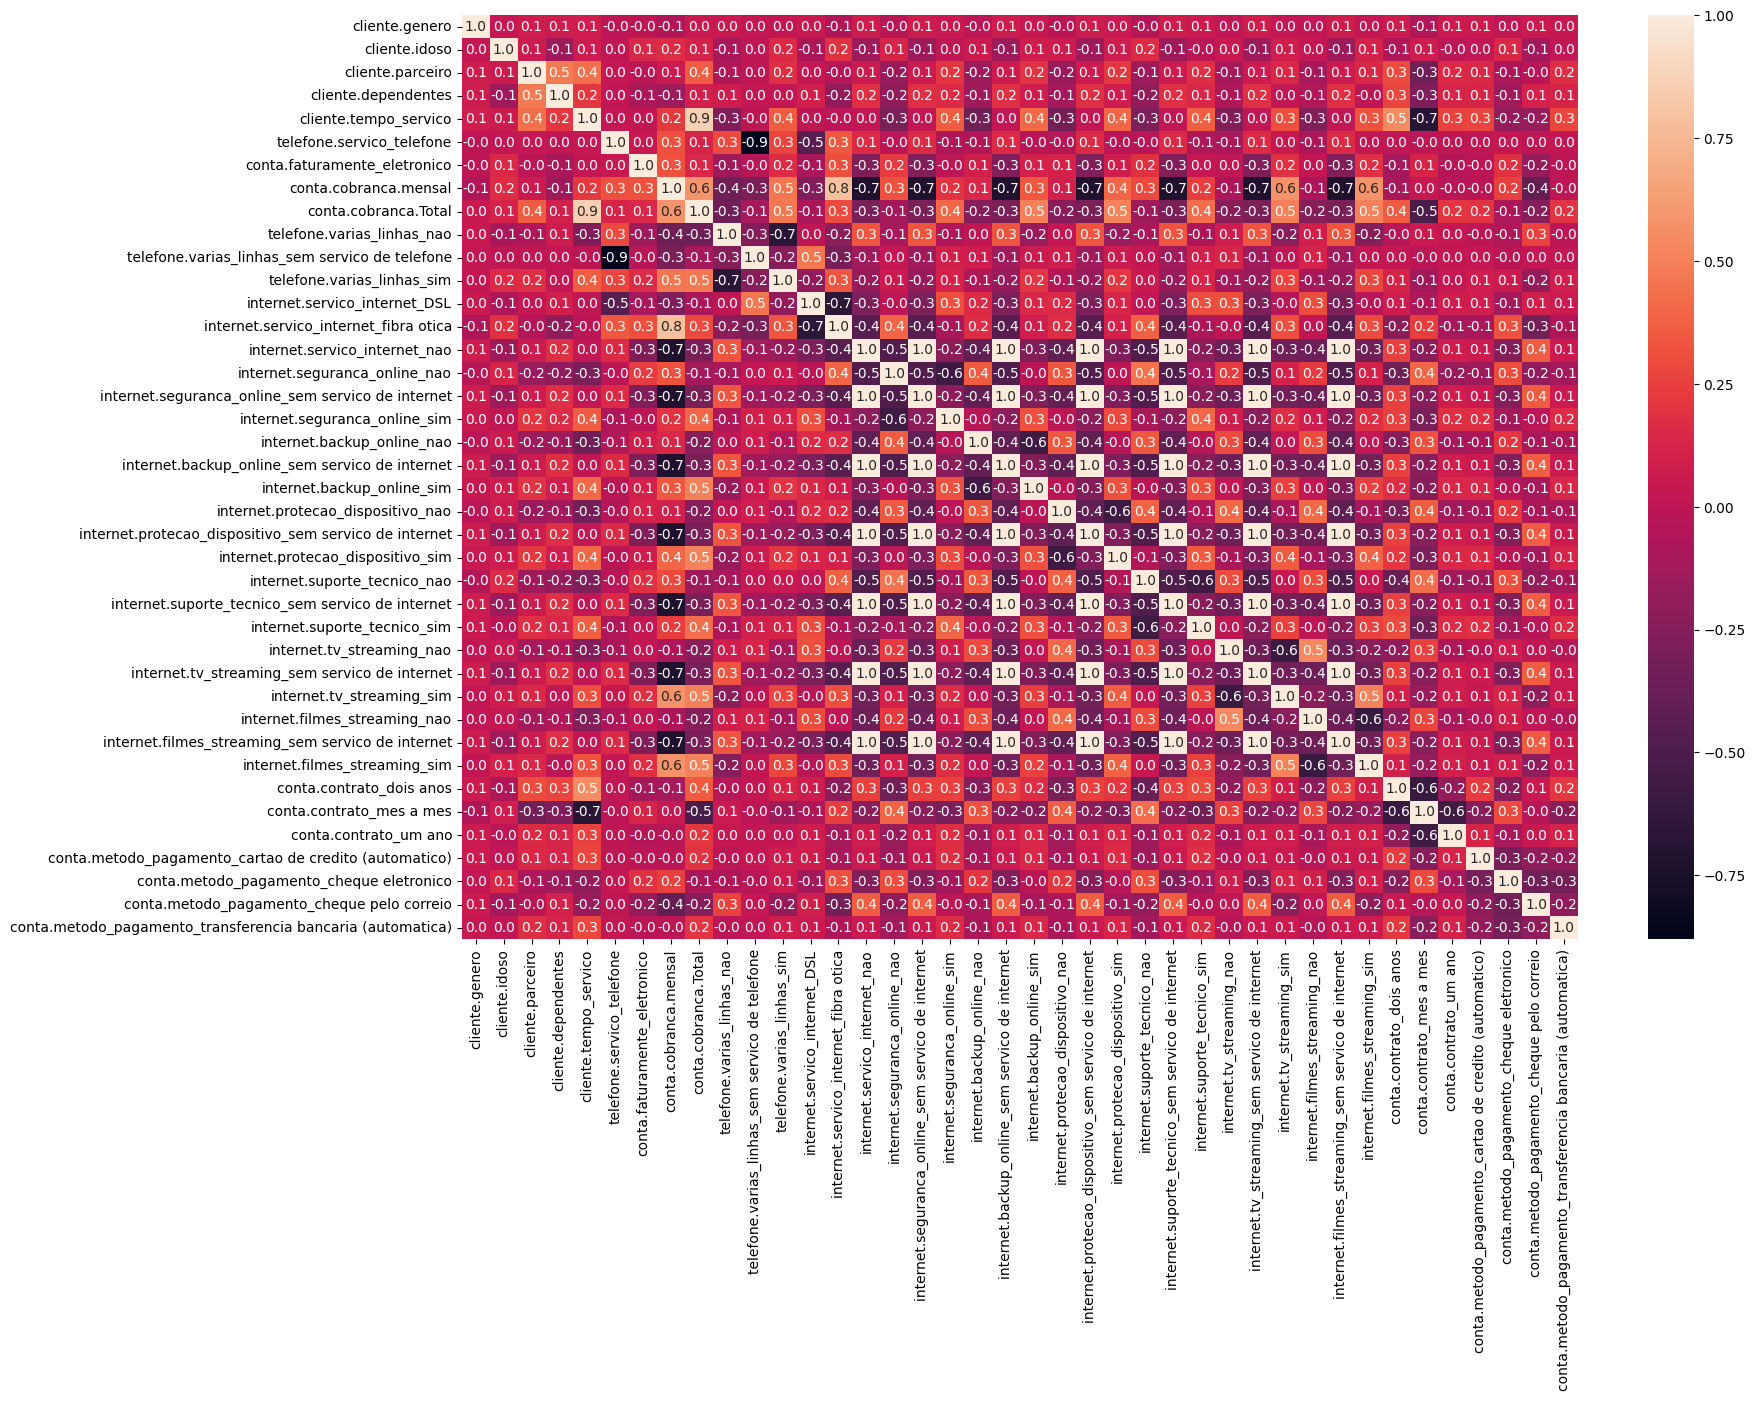

In [198]:
import matplotlib.pyplot as plt

corr = x.corr()

fig, ax = plt.subplots(figsize= (18,12))
ax = sns.heatmap(corr, annot = True, fmt ='.1f')

In [202]:
corr_variables = corr[corr> 0.905].sum()
corr_variables = corr_variables[corr_variables>1]
corr_variables.index

Index(['internet.servico_internet_nao',
       'internet.seguranca_online_sem servico de internet',
       'internet.backup_online_sem servico de internet',
       'internet.protecao_dispositivo_sem servico de internet',
       'internet.suporte_tecnico_sem servico de internet',
       'internet.tv_streaming_sem servico de internet',
       'internet.filmes_streaming_sem servico de internet'],
      dtype='object')

In [203]:
x_v2 = x.drop(corr_variables.index, axis = 1)
x_v2

,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,telefone.varias_linhas_nao,...,internet.tv_streaming_sim,internet.filmes_streaming_nao,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,1,0,0,0,9.000000,1,0,59.900000,542.400000,0,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,4.000000,1,1,73.900000,280.850000,1,...,0,1,0,0,1,0,0,1,0,0
2,1,1,1,0,13.000000,1,1,98.000000,1237.850000,1,...,1,0,1,0,1,0,0,1,0,0
3,0,1,1,0,3.000000,1,1,83.900000,267.400000,1,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,1,9.000000,1,1,69.400000,571.450000,1,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,1,0,1,0,5.000000,1,1,79.830085,413.878963,0,...,0,1,0,0,1,0,0,1,0,0
10286,0,0,0,0,6.000000,1,0,78.130729,434.420923,0,...,0,1,0,0,1,0,0,1,0,0
10287,0,0,0,0,33.886803,1,0,74.272611,2524.618380,1,...,0,0,0,0,0,0,0,0,0,0
10288,0,0,0,0,12.001144,1,1,100.145997,1164.298342,0,...,1,0,1,0,1,0,0,0,0,0


In [204]:
rfc_classificator(x_v2, y)

We will train with 7717 elements and test with 2573 elements
RFC result: 85.11%


# Automatizing the correlated variables selection

In [219]:
from sklearn.feature_selection import SelectKBest, chi2

SEED = 42
np.random.seed(SEED)

kbest_features = SelectKBest(chi2, k = 25)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25)
kbest_features.fit(x_train, y_train)

kbest_train = kbest_features.transform(x_train)
kbest_test = kbest_features.transform(x_test)

In [220]:
pd.DataFrame(kbest_train)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,1.000000,84.312526,84.312526,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,22.000000,84.239906,1855.064088,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,72.000000,87.100000,6230.100000,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,8.000000,55.750000,446.800000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,9.463566,90.158375,856.346047,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,1.0,0.0,72.000000,84.900000,6065.300000,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7713,0.0,0.0,4.000000,23.900000,97.500000,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7714,1.0,1.0,63.000000,19.350000,1263.850000,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7715,0.0,0.0,4.000000,80.250000,303.700000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [221]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

SEED = 42
np.random.seed(SEED)

rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(kbest_train, y_train)

rfc_predict = rfc.predict(kbest_test)

print(f'RFC result: {rfc.score(kbest_test, y_test)*100:.2f}%')

RFC result: 84.03%


# Confusion Matrix

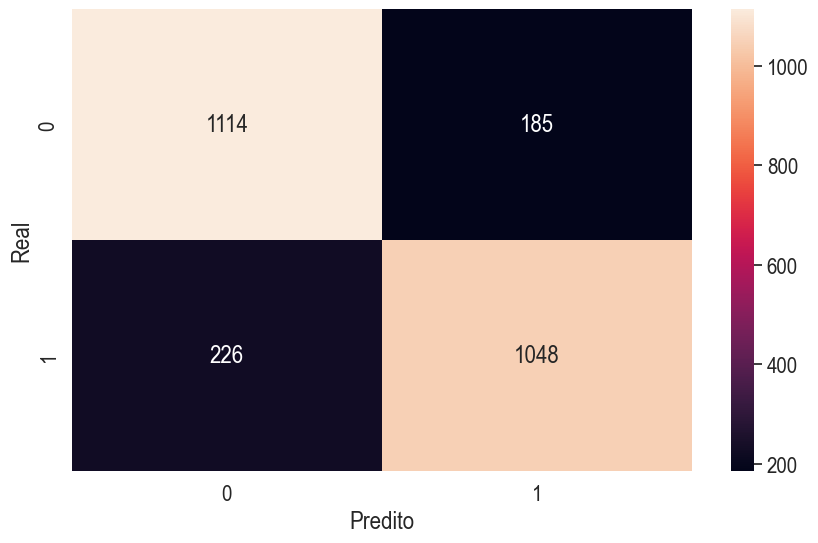

In [222]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, rfc_predict)


plt.figure(figsize= (10, 6))
sns.set(font_scale = 1.5)
sns.heatmap(confusion, annot = True, fmt = 'd').set(xlabel = 'Predito', ylabel = 'Real')
plt.show()

In [223]:
1048 / (1048+226)

0.8226059654631083

# RFE

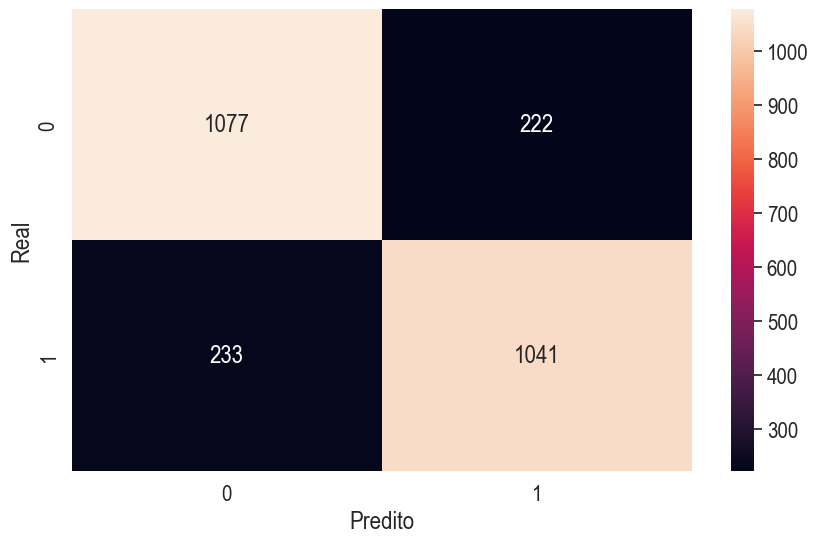

RFC with RFE result: 82.32%


In [225]:
from sklearn.feature_selection import RFE

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25)

rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(x_train, y_train)

rfe_selector = RFE(estimator = rfc , n_features_to_select = 10, step = 1 )
rfe_selector.fit(x_train, y_train)

rfe_train = rfe_selector.transform(x_train)
rfe_test = rfe_selector.transform(x_test)

# Training and predicting Random Forest Classifier with new rfe_test and rfe_train
rfc.fit(rfe_train, y_train)
rfc_predict = rfc.predict(rfe_test)

# Confusion matrix
confusion = confusion_matrix(y_test, rfc_predict)

plt.figure(figsize= (10, 6))
sns.set(font_scale = 1.5)
sns.heatmap(confusion, annot = True, fmt = 'd').set(xlabel = 'Predito', ylabel = 'Real')
plt.show()


print(f'RFC with RFE result: {rfc.score(rfe_test, y_test)*100:.2f}%')

# Conclusion

So, the ML model Random Forest Classifier was choose.